<a href="https://colab.research.google.com/github/hawwyo/hr-analytics/blob/main/analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.3f}'.format

In [2]:
#@title
url = 'https://raw.githubusercontent.com/hawwyo/hr-analytics/main/muratov-tobola-dataset.csv'
# url = 'https://raw.githubusercontent.com/hawwyo/hr-analytics/main/cars.csv'
data = pd.read_csv(url).iloc[:, 1:]

In [3]:
#@title
index = [
    'Среднее',
    'Стандартная ошибка',
    'Медиана',
    'Мода',
    'Стандартное отклонение',
    'Дисперсия',
    'Эксцесс',
    'Асимметричность',
    'Интервал',
    'Минимум',
    'Максимум',
    'Сумма',
    'Счет',
    # 'Наибольший',
    # 'Наименьший',
    # 'Уровень надежности'
]

numerical_columns = [
    'Age',
    'DistanceFromHome',
    'MonthlyIncome',
    'NumCompaniesWorked',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',

]

quantitive_columns = [
    'Attrition', # целевая функция
    'BusinessTravel',
    'Department',
    'Education', 
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',

]

**Описательная статистика**

---



Все параметры имеют асимметрию, отличную от 0.

Параметр MonthlyIncome имеет очень большое стандартное отклонение.



In [4]:
#@title
def get_descriptive_statistics(column_name):
    column = data[column_name]
    
    values = [ 
        column.mean(), 
        column.sem(), 
        column.median(), 
        column.mode()[0], 
        column.std(), 
        column.var(), 
        column.kurtosis(), 
        column.skew(), 
        column.max() - column.min(), 
        column.min(), 
        column.max(),
        column.sum(),
        column.shape[0]
    ]
    # print(values)
    # print( column.describe() )
    return pd.Series(values, index)
    

descriptive_statistics_result = pd.DataFrame()

for column_name in numerical_columns:
    descriptive_statistics_result[ column_name ] = get_descriptive_statistics(column_name)

descriptive_statistics_result

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Среднее,36.924,9.193,6502.931,2.693,11.280,2.799,7.008,4.229,2.188,4.123
Стандартная ошибка,0.238,0.211,122.793,0.065,0.203,0.034,0.160,0.094,0.084,0.093
Медиана,36.000,7.000,4919.000,2.000,10.000,3.000,5.000,3.000,1.000,3.000
Мода,35.000,2.000,2342.000,1.000,10.000,2.000,5.000,2.000,0.000,2.000
Стандартное отклонение,9.135,8.107,4707.957,2.498,7.781,1.289,6.127,3.623,3.222,3.568
Дисперсия,83.455,65.721,22164857.072,6.240,60.541,1.662,37.534,13.127,10.384,12.732
Эксцесс,-0.404,-0.225,1.005,0.010,0.918,0.495,3.936,0.477,3.613,0.171
Асимметричность,0.413,0.958,1.370,1.026,1.117,0.553,1.765,0.917,1.984,0.833
Интервал,42.000,28.000,18990.000,9.000,40.000,6.000,40.000,18.000,15.000,17.000
Минимум,18.000,1.000,1009.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [5]:
#@title
# plt.hist( data['MonthlyIncome'] )

**Шкала Чеддока**

---



|     Значение    |  Интерпретация |
|:---------------:|:--------------:|
|    от 0 до 0,3  |  очень слабая  |
|   от 0,3 до 0,5 |     слабая     |
|  от 0, 5 до 0,7 |     средняя    |
|  от 0,7 до 0, 9 |     высокая    |
|    от 0,9 до 1  |  очень высокая |

**Используя шкалу Чеддока, были сделаны следующие выводы:**

Следующие переменные имеют высокую степень корреляции: 
- YearsWithCurrManager и YearsAtCompany
- YearsWithCurrManager и YearsInCurrentRole
- YearsInCurrentRole и YearsAtCompany
- TotalWorkingYears и MonthlyIncome

Время работы с одним менеджером и на текущей должности зависит от времени работы в компании.

Стаж сотрудника влияет на его заработную плату. 

**Корреляционная матрица:**

---



In [6]:
#@title
data[numerical_columns].corr()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000,-0.002,0.498,0.300,0.680,-0.020,0.311,0.213,0.217,0.202
DistanceFromHome,-0.002,1.000,-0.017,-0.029,0.005,-0.037,0.010,0.019,0.010,0.014
MonthlyIncome,0.498,-0.017,1.000,0.150,0.773,-0.022,0.514,0.364,0.345,0.344
NumCompaniesWorked,0.300,-0.029,0.150,1.000,0.238,-0.066,-0.118,-0.091,-0.037,-0.110
TotalWorkingYears,0.680,0.005,0.773,0.238,1.000,-0.036,0.628,0.460,0.405,0.459
TrainingTimesLastYear,-0.020,-0.037,-0.022,-0.066,-0.036,1.000,0.004,-0.006,-0.002,-0.004
YearsAtCompany,0.311,0.010,0.514,-0.118,0.628,0.004,1.000,0.759,0.618,0.769
YearsInCurrentRole,0.213,0.019,0.364,-0.091,0.460,-0.006,0.759,1.000,0.548,0.714
YearsSinceLastPromotion,0.217,0.010,0.345,-0.037,0.405,-0.002,0.618,0.548,1.000,0.510
YearsWithCurrManager,0.202,0.014,0.344,-0.110,0.459,-0.004,0.769,0.714,0.510,1.000


Большинство выборок содержат неправдоподобные измерения (аномалии). 

При наивысшем уровне образования отсутсвуют "выбросы".

Верхний ус длиннее нижнего, распределения имеет положительную асимметрию.

Чем больше уровень образования сотрудника, тем больше его медианная заработная плата.

При том, в каждой выборке существуют сотрудники с высокой заработной платой.

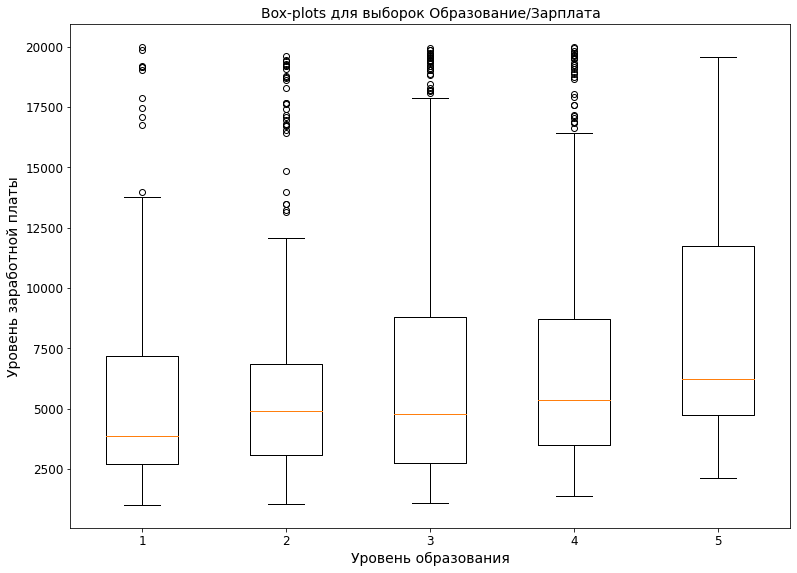

In [7]:
#@title 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

categorical = 'Education'
quantitive = 'MonthlyIncome'

education_values = data[categorical].unique() # 1 - 5

# get samples
samples = {}
for v in education_values:
    query = data[
        data[categorical] == v
    ][quantitive]
    
    samples[v] = query
    # print(v, query.shape)
sorted_samples = {k: v for k, v in sorted(samples.items(), key=lambda item: item[0])}

# visualisation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(sorted_samples.values())

plt.title('Box-plots для выборок Образование/Зарплата', fontsize=14)
plt.xlabel('Уровень образования', fontsize=14)
plt.ylabel('Уровень заработной платы', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


# for sample in sorted_samples:
#     plt.title(sample)
#     plt.subplot(2, 3, sample)
#     plt.boxplot(samples[sample])


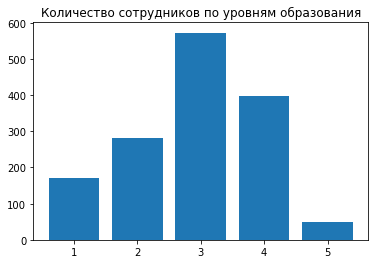

In [8]:
#@title
x = [i for i in range(1, 5+1)]
y = [len(sorted_samples[i]) for i in range(1, 5+1)]
plt.title('Количество сотрудников по уровням образования')
plt.bar(x, y)
plt.show()

Power_divergenceResult(statistic=3320.228011348981, pvalue=1.5770798053678106e-144)


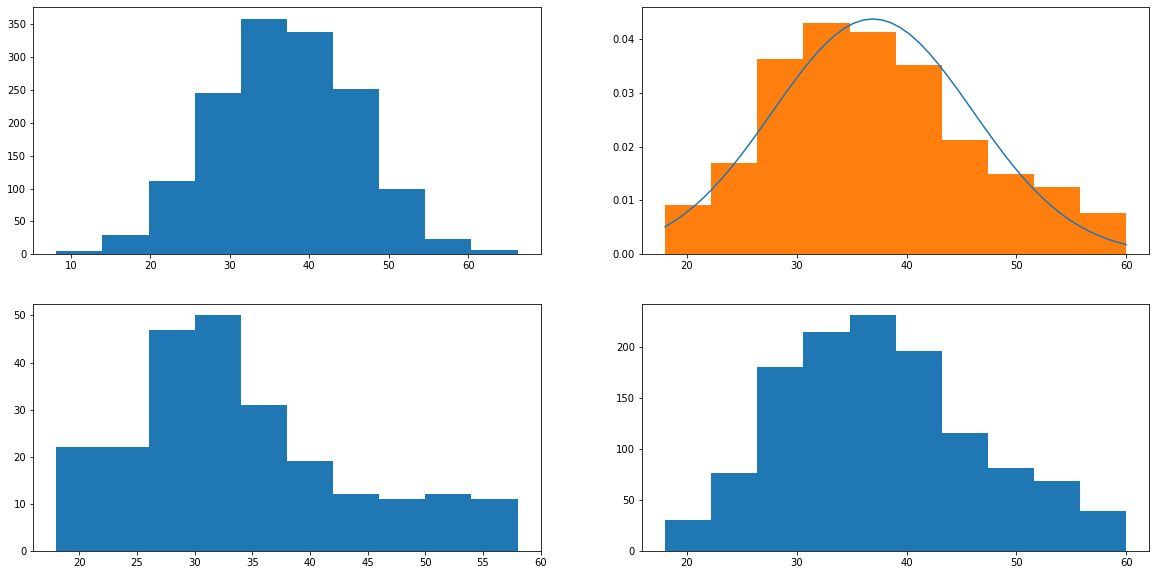

In [9]:
#@title
# plt.hist( data['Age'] ) 

norm_data = np.random.normal(data['Age'].mean(), data['Age'].std(), data['Age'].shape[0])
# norm_data = stats.norm.rvs(data['Age'].mean(), data['Age'].std(), 100)

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(norm_data)

plt.subplot(222)

x = np.linspace(data['Age'].min(), data['Age'].max(), )
y = stats.norm(data['Age'].mean(), data['Age'].std()).pdf(x)
plt.plot(x, y)
plt.hist(data['Age'], density=True)

plt.subplot(223)
plt.hist(data[data['Attrition'] == 'Yes']['Age'])

plt.subplot(224)
plt.hist(data[data['Attrition'] == 'No']['Age'])

print( stats.chisquare(data['Age']) )
plt.show()
# !pip list | grep scipy

Построив на одном графике распределение переменных и нормальное распределение, можно сразу сказать, что распределение параметров DistanceFromHome, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion и YearsWIthCurrManager имеют распределение, отличное от нормального. 

Для определения близости распределения параметра Age к нормальному, воспользуемся критерием согласия хи-квадрат (критерий Пирсона).

Разделим всю выборку на 11 интервалов. Посчитаем частоты в каждом интервале, а также ожидаемые частоты. Предположим, что нормальное распреджеление имеет среднее = 36.924, среднеквадратичное отклонение = 9.135

| Интервалы: | Частоты | Ожидаемые частоты | Хи квадрат |
|:----------:|:-------:|:-----------------:|:----------:|
|  18 --- 21 |    41   |       47.06       |    0.78    |
|  22 --- 25 |    82   |       95.15       |    1.82    |
|  26 --- 29 |   203   |       159.29      |    12.0    |
|  30 --- 33 |   248   |       220.81      |    3.35    |
|  34 --- 37 |   274   |       253.46      |    1.66    |
|  38 --- 41 |   197   |       240.92      |    8.01    |
|  42 --- 45 |   152   |       189.62      |    7.46    |
|  46 --- 49 |   100   |       123.58      |    4.50    |
|  50 --- 53 |    86   |       66.69       |    5.59    |
|  54 --- 57 |    58   |       29.80       |    26.70   |
|  58 --- 61 |    29   |       11.02       |    29.30   |
|    Сумма = |   1470  |      1437.39      |   101.176  |

Выборочное значение статистики равно 101.176

Квантиль порядка 0.95 распределения 𝜒^2 с (11 - 2 - 1) степенями свободы = 15.507

Тогда, распределение параметра Age отлично от нормального.

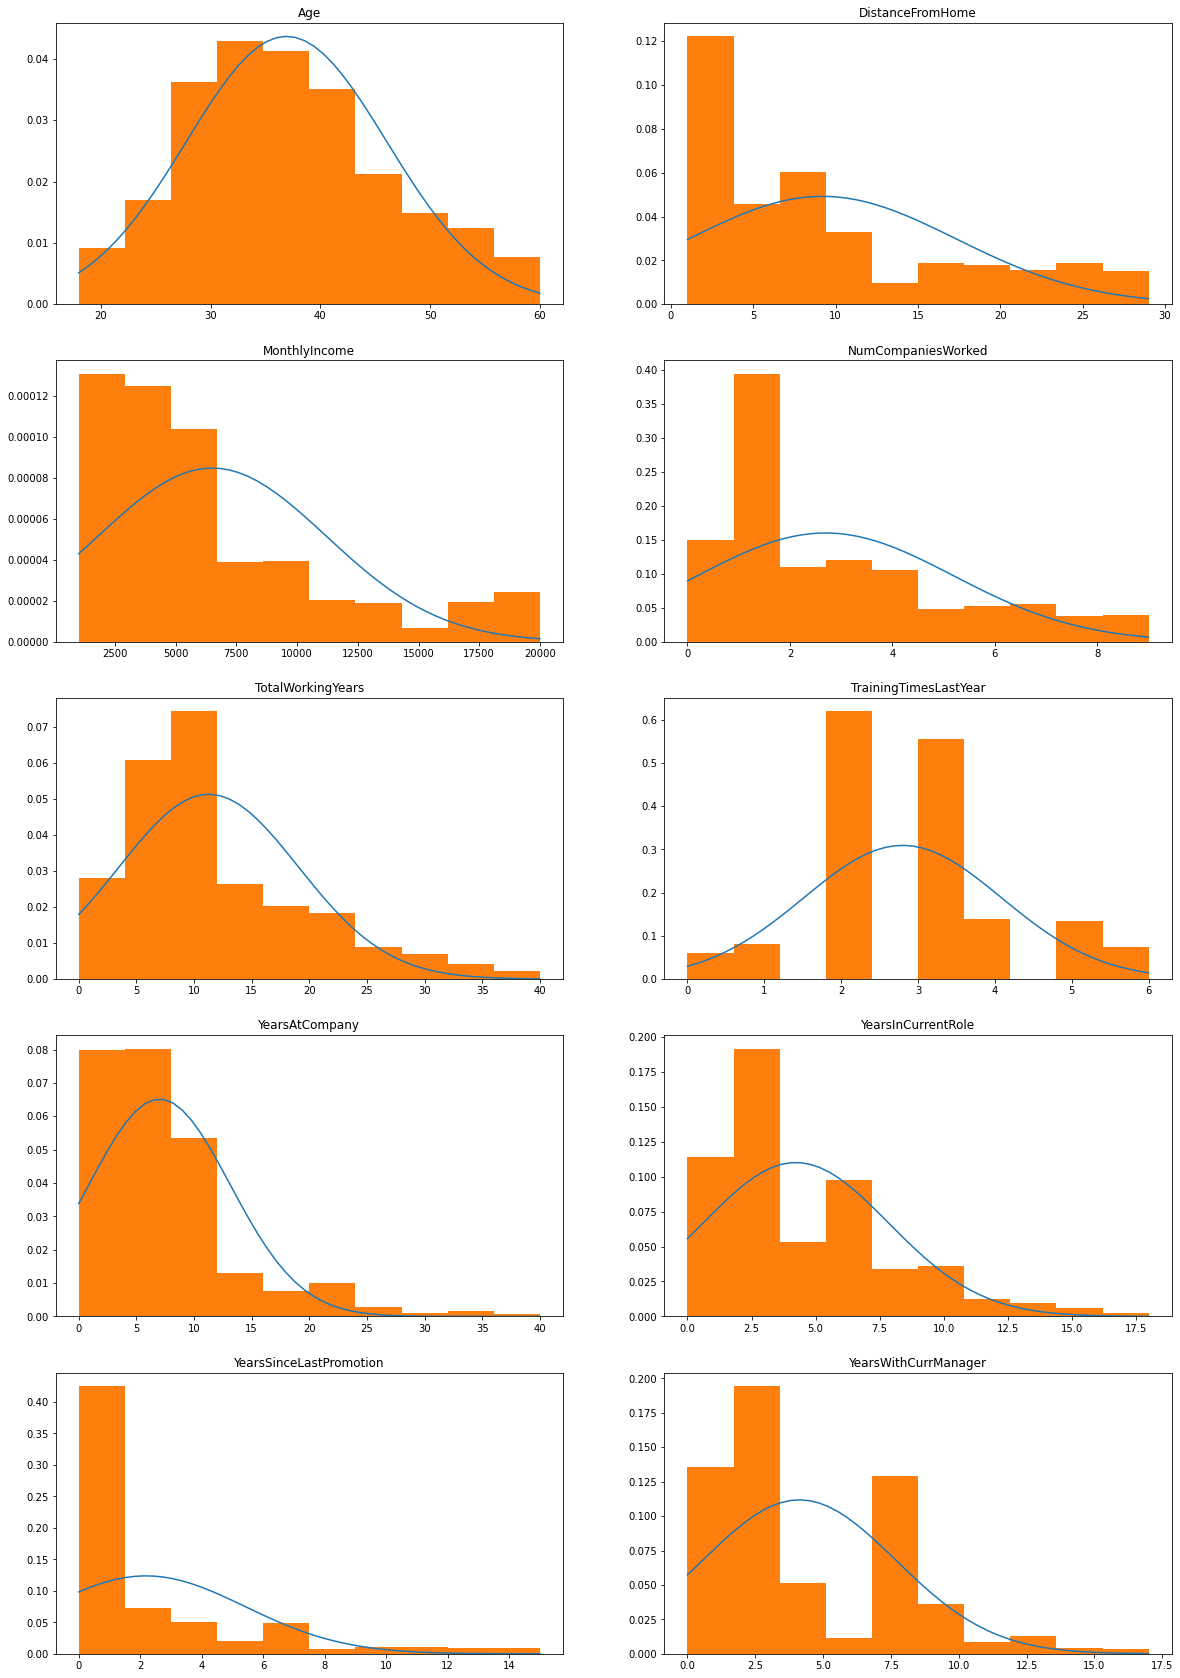

In [10]:
#@title
plt.figure(figsize=(20, 30))

n = 5; m = 2

cur = 1
for column_name in numerical_columns:
    plt.subplot( n, m, cur )
    plt.title( column_name )
    x = np.linspace(data[column_name].min(), data[column_name].max(), )
    y = stats.norm(data[column_name].mean(), data[column_name].std()).pdf(x)
    plt.plot(x, y)
    plt.hist(data[column_name], density=True)
    # plt.hist(data[column_name])
    cur += 1




In [11]:
#@title
num_groups = math.ceil(0 + 3.322 * math.log10( data['Age'].shape[0] ))

count = [0] * 100
for age in data['Age']:
    count[age] += 1

mn = data['Age'].min()
groups = [0] * num_groups
groups_len = math.ceil((data['Age'].max() - data['Age'].min()) / num_groups)
for age in data['Age']:
    groups[(age - mn) // groups_len] += 1

print(num_groups, groups_len)

expected_f = [0] * num_groups
norm_distr = stats.norm( data['Age'].mean(), data['Age'].std() )

for i in range(num_groups):
    expected_f[i] = data['Age'].shape[0] * ( norm_distr.cdf( mn + (i + 1) * groups_len ) - norm_distr.cdf(mn + i * groups_len) )
    # expected_f[i] = round( expected_f[i] )

print(sum(expected_f))

# for i in expected_f:
#     print( f'{i:.2f}' )

print( expected_f )

chi_value = 0
for i in range(num_groups):
    chi_value += ((groups[i] - expected_f[i]) ** 2) / expected_f[i]
    print(  f'{((groups[i] - expected_f[i]) ** 2) / expected_f[i]:.3}'   )

chi2 = stats.chi2(num_groups - 3)

print(chi_value, chi2.ppf(0.95))

print(stats.normaltest(data['Age']))

11 4
1437.391575450313
[47.05728970126838, 95.14526972764448, 159.28735339178576, 220.81165873536602, 253.46472941085133, 240.91919011873435, 189.6191925265072, 123.57885801560042, 66.68779199726417, 29.797071747382624, 11.023170077908235]
0.78
1.82
12.0
3.35
1.66
8.01
7.46
4.5
5.59
26.7
29.3
101.1755431026486 15.50731305586545
NormaltestResult(statistic=54.68430031753582, pvalue=1.3349194556165794e-12)


In [12]:
#@title
from scipy import stats
import numpy as np

# maybe preprocess data before CHI**2?

for column in numerical_columns[:]:
    # k2, p = stats.normaltest(data[column])
    # print(f'{k2} {p}') 0.05
    # val = stats.chisquare(np.random.normal(data[column].mean(), data[column].std(), 20000)) # p = 0.05
    # val = stats.chisquare(data[column] )
    val = stats.normaltest(data[column])
    print( val )
    # print(f'{column} {val.pvalue:.90f}')

# plt.hist(np.random.normal(data['Age'].mean(), data['Age'].std(), 200000) )

# print('pizdec not normal distribution?')
stats.kstest( data['Age'].values, 'norm' )

NormaltestResult(statistic=54.68430031753582, pvalue=1.3349194556165794e-12)
NormaltestResult(statistic=168.69438999527182, pvalue=2.3360312516323686e-37)
NormaltestResult(statistic=305.3342592999294, pvalue=4.9831966397226114e-67)
NormaltestResult(statistic=183.06154400817354, pvalue=1.7729267563705434e-40)
NormaltestResult(statistic=233.7378580236686, pvalue=1.755775660131454e-51)
NormaltestResult(statistic=76.71874219062896, pvalue=2.1914764299034e-17)
NormaltestResult(statistic=518.18934607392, pvalue=2.996492600005795e-113)
NormaltestResult(statistic=164.07304432135786, pvalue=2.3550010824485376e-36)
NormaltestResult(statistic=564.3228783257148, pvalue=2.876364802180292e-123)
NormaltestResult(statistic=134.347685538225, pvalue=6.710745319247093e-30)


KstestResult(statistic=1.0, pvalue=0.0)

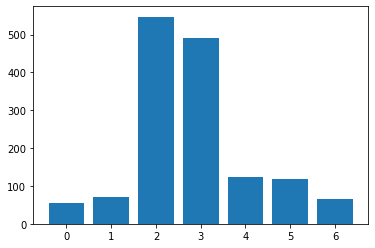

In [13]:
#@title
#plt.figure(figsize=(10, 10))
for column in numerical_columns[5:6]:
    #print(data[column].value_counts())
    plt.bar(
        data[column].value_counts().keys(),
        data[column].value_counts()
    )

In [14]:
#@title
quantitive_column_unique_values = {}
for column in quantitive_columns:
    quantitive_column_unique_values[column] = data[column].unique()
    print(column)
    print(data[column].unique(), end='\n\n')

#quantitive_column_unique_values
"""
Attrition Yes
BusinessTravel Travel_Rarely
BusinessTravel Travel_Frequently
Department Sales
Department Research & Development
Education 2
Education 1
Education 4
Education 3
EducationField Life Sciences
EducationField Other
EducationField Medical
EducationField Marketing
EducationField Technical Degree
EnvironmentSatisfaction 2
EnvironmentSatisfaction 3
EnvironmentSatisfaction 4
Gender Female
JobInvolvement 3
JobInvolvement 2
JobInvolvement 4
JobRole Sales Executive
JobRole Research Scientist
JobRole Laboratory Technician
JobRole Manufacturing Director
JobRole Healthcare Representative
JobRole Manager
JobRole Sales Representative
JobRole Research Director
JobSatisfaction 4
JobSatisfaction 2
JobSatisfaction 3
MaritalStatus Single
MaritalStatus Married
OverTime Yes
PerformanceRating 3
RelationshipSatisfaction 1
RelationshipSatisfaction 4
RelationshipSatisfaction 2
"""

Attrition
['Yes' 'No']

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

Education
[2 1 4 3 5]

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

EnvironmentSatisfaction
[2 3 4 1]

Gender
['Female' 'Male']

JobInvolvement
[3 2 4 1]

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

JobSatisfaction
[4 2 3 1]

MaritalStatus
['Single' 'Married' 'Divorced']

OverTime
['Yes' 'No']

PerformanceRating
[3 4]

RelationshipSatisfaction
[1 4 2 3]



'\nAttrition Yes\nBusinessTravel Travel_Rarely\nBusinessTravel Travel_Frequently\nDepartment Sales\nDepartment Research & Development\nEducation 2\nEducation 1\nEducation 4\nEducation 3\nEducationField Life Sciences\nEducationField Other\nEducationField Medical\nEducationField Marketing\nEducationField Technical Degree\nEnvironmentSatisfaction 2\nEnvironmentSatisfaction 3\nEnvironmentSatisfaction 4\nGender Female\nJobInvolvement 3\nJobInvolvement 2\nJobInvolvement 4\nJobRole Sales Executive\nJobRole Research Scientist\nJobRole Laboratory Technician\nJobRole Manufacturing Director\nJobRole Healthcare Representative\nJobRole Manager\nJobRole Sales Representative\nJobRole Research Director\nJobSatisfaction 4\nJobSatisfaction 2\nJobSatisfaction 3\nMaritalStatus Single\nMaritalStatus Married\nOverTime Yes\nPerformanceRating 3\nRelationshipSatisfaction 1\nRelationshipSatisfaction 4\nRelationshipSatisfaction 2\n'

In [15]:
#@title
n_data = data[:]
# n_data is data should be false, this means that created deep copy

for column_name, unique_values in quantitive_column_unique_values.items():
    column_index = n_data.columns.get_loc(column_name)
    for unique_value in unique_values[:-1]:
        print(column_name, unique_value)
        
        n_col = data[column_name] == unique_value
        n_col_name = f'{column_name}_{unique_value}'
        n_data.insert(
            column_index + 1,
            n_col_name,
            n_col.astype(int)
        )
        column_index += 1
    #break
n_data

Attrition Yes
BusinessTravel Travel_Rarely
BusinessTravel Travel_Frequently
Department Sales
Department Research & Development
Education 2
Education 1
Education 4
Education 3
EducationField Life Sciences
EducationField Other
EducationField Medical
EducationField Marketing
EducationField Technical Degree
EnvironmentSatisfaction 2
EnvironmentSatisfaction 3
EnvironmentSatisfaction 4
Gender Female
JobInvolvement 3
JobInvolvement 2
JobInvolvement 4
JobRole Sales Executive
JobRole Research Scientist
JobRole Laboratory Technician
JobRole Manufacturing Director
JobRole Healthcare Representative
JobRole Manager
JobRole Sales Representative
JobRole Research Director
JobSatisfaction 4
JobSatisfaction 2
JobSatisfaction 3
MaritalStatus Single
MaritalStatus Married
OverTime Yes
PerformanceRating 3
RelationshipSatisfaction 1
RelationshipSatisfaction 4
RelationshipSatisfaction 2


,Age,Attrition,Attrition_Yes,BusinessTravel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department,Department_Sales,Department_Research & Development,DistanceFromHome,...,RelationshipSatisfaction,RelationshipSatisfaction_1,RelationshipSatisfaction_4,RelationshipSatisfaction_2,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,Travel_Rarely,1,0,Sales,1,0,1,...,1,1,0,0,8,0,6,4,0,5
1,49,No,0,Travel_Frequently,0,1,Research & Development,0,1,8,...,4,0,1,0,10,3,10,7,1,7
2,37,Yes,1,Travel_Rarely,1,0,Research & Development,0,1,2,...,2,0,0,1,7,3,0,0,0,0
3,33,No,0,Travel_Frequently,0,1,Research & Development,0,1,3,...,3,0,0,0,8,3,8,7,3,0
4,27,No,0,Travel_Rarely,1,0,Research & Development,0,1,2,...,4,0,1,0,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,0,Travel_Frequently,0,1,Research & Development,0,1,23,...,3,0,0,0,17,3,5,2,0,3
1466,39,No,0,Travel_Rarely,1,0,Research & Development,0,1,6,...,1,1,0,0,9,5,7,7,1,7
1467,27,No,0,Travel_Rarely,1,0,Research & Development,0,1,4,...,2,0,0,1,6,0,6,2,0,3
1468,49,No,0,Travel_Frequently,0,1,Sales,1,0,2,...,4,0,1,0,17,3,9,6,0,8


**3.1	Укажите все выбросы («дикие измерения»). Проанализируйте и укажите, как они рассматриваются в анализе**

В целом по каждому признаку наблюдается небольшое количесво выбросов.

У признака TrainingTimesLastYear медиана совпадает с 3-им квартилем. 75% сотрудников проходят курсы повышения квалификации 3 раза в год.  

Признак MonthlyIncome имеет наибольший процент выбросов.

Распределения большинства признаков имеют положительную асимметрию. 

Признак Age визуально имеет распределение без асимметрии.

|         Признак         | Процент выбросов |
|:-----------------------:|:----------------:|
|           Age           |      0.00 %      |
|     DistanceFromHome    |      0.00 %      |
|      MonthlyIncome      |      7.76 %      |
|    NumCompaniesWorked   |      0.00 %      |
|    TotalWorkingYears    |      3.13 %      |
|  TrainingTimesLastYear  |      0.00 %      |
|      YearsAtCompany     |      6.33 %      |
|    YearsInCurrentRole   |      0.41 %      |
| YearsSinceLastPromotion |      4.90 %      | 
|   YearsWithCurrManager  |      0.48 %      |

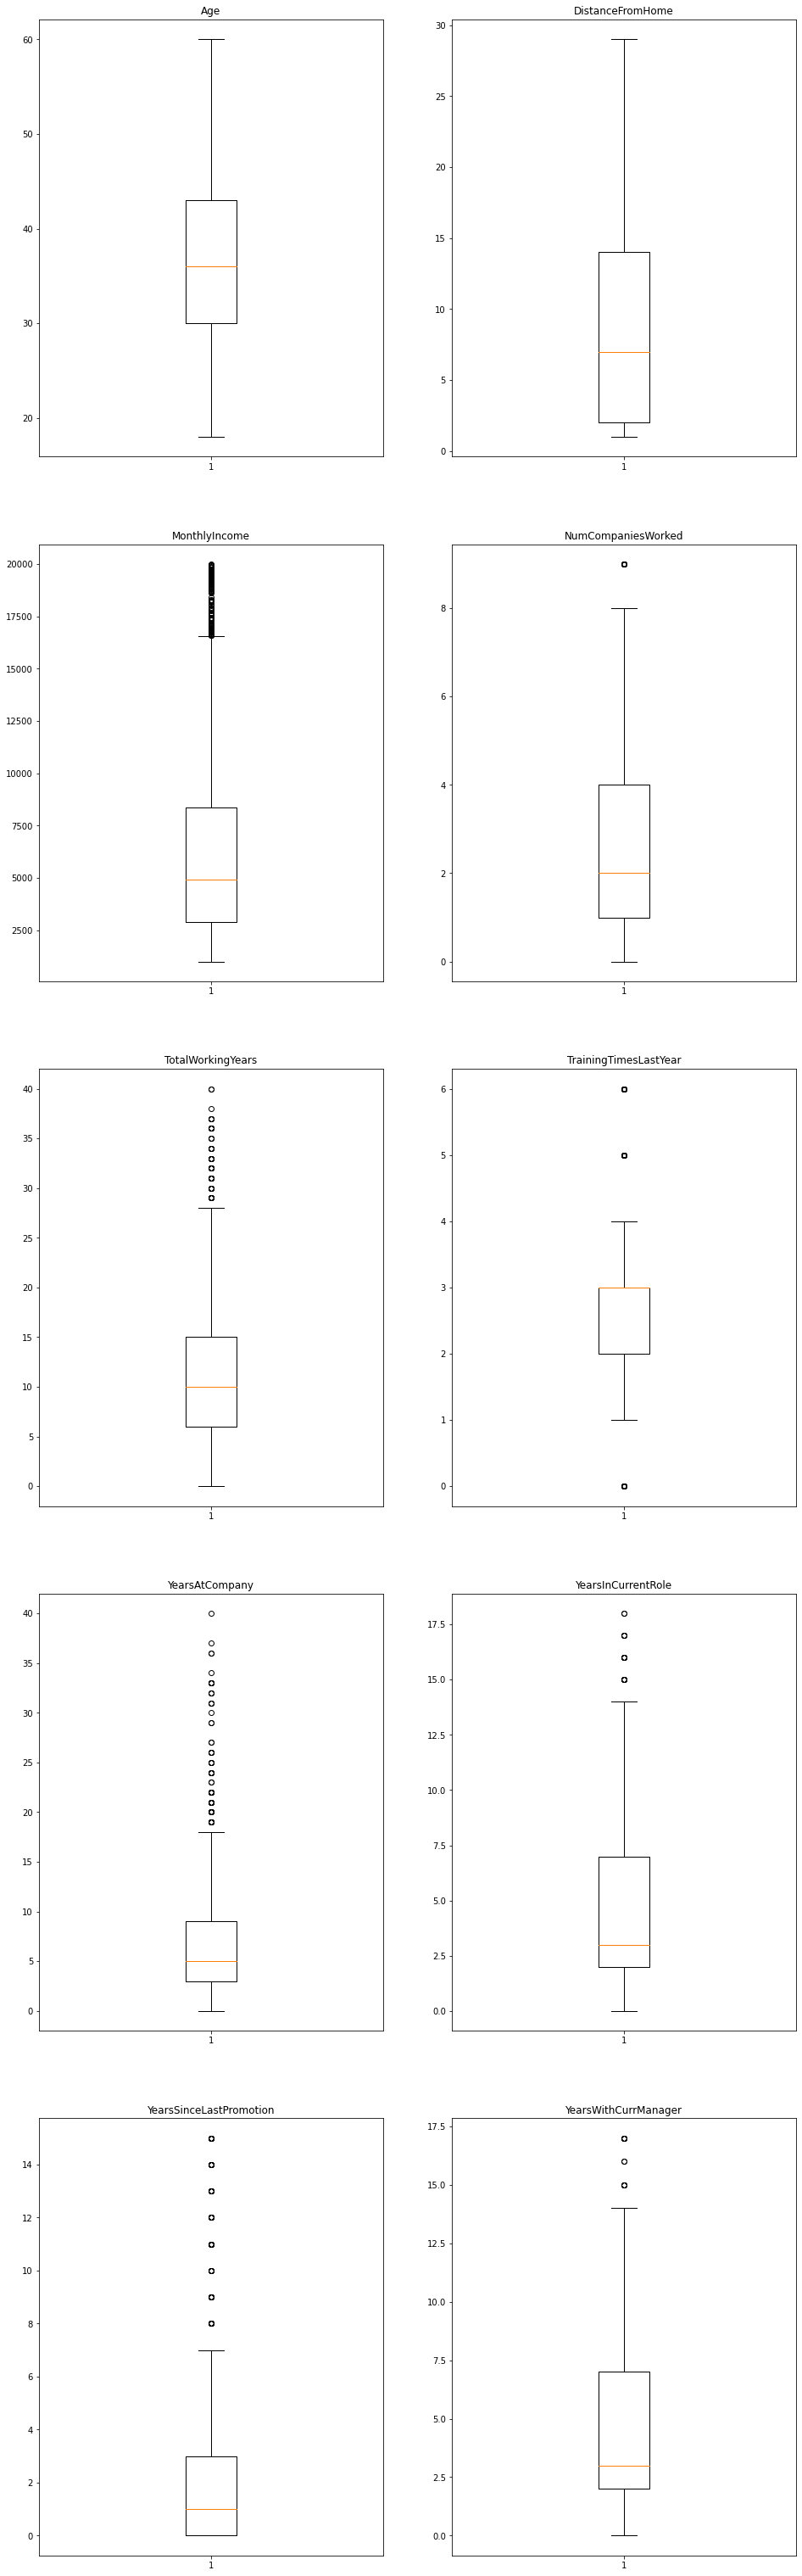

In [16]:
#@title
# for column_name in quantitive_columns:
#     print( data[column_name].value_counts() )

# plt.boxplot( data['TrainingTimesLastYear'] )

plt.figure(figsize=(16, 55))
cnt = 1
for column_name in numerical_columns:
    plt.subplot(5, 2, cnt)
    plt.boxplot( data[column_name] )
    plt.title(column_name)

    cnt += 1
    
plt.show()

In [17]:
#@title
bad_values = {}

for column_name in numerical_columns:
    q75, q25 = data[column_name].quantile([0.75, 0.25])
    r = (q75 - q25 + 1) * 1.5
    mx_good = q75 + r
    mn_good = q25 - r

    bad_values[column_name] = data[ (data[column_name] > mx_good) | (data[column_name] < mn_good) ]
    
    # print(q25, q75, column_name)

OVERALL = 1470
for k in bad_values:
    print(f'{k} {(bad_values[k].shape[0] / OVERALL * 100):.2f} %')
# bad_values['MonthlyIncome']['TotalWorkingYears'].value_counts()

Age 0.00 %
DistanceFromHome 0.00 %
MonthlyIncome 7.76 %
NumCompaniesWorked 0.00 %
TotalWorkingYears 3.13 %
TrainingTimesLastYear 0.00 %
YearsAtCompany 6.33 %
YearsInCurrentRole 0.41 %
YearsSinceLastPromotion 4.90 %
YearsWithCurrManager 0.48 %


In [18]:
#@title
with pd.ExcelWriter('output.xlsx') as writer:  
    n_data.to_excel(writer, sheet_name='Add_new_variables')
    for k in bad_values:
        bad_values[k].to_excel(writer, sheet_name=f'{k}_anomaly')

In [135]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_latex.html

from scipy.stats import chi2_contingency
import math

def get_contigency(a, b):
    contingency = pd.crosstab(data[a], data[b])
    chi_square_test = chi2_contingency(contingency)
    return contingency, chi_square_test

def get_pearson_coef(chi, n=1470):
    chi2 = chi[1][0]
    return math.sqrt(
        chi2 / (chi2 + n)
    )
    
# TODO: REMOVE ANOMALIES
# for i in quantitive_columns:
#     for j in quantitive_columns:
#         table, chi = get_contigency(i, j)
#         tables.append(table)
#         if chi[1] < 0.06 and i < j and i != 'Attrition' and j != 'Attrition':
#             print(i)
#             print(j)
#             print(chi[1], end="\n\n\n")
        

# Независимые
department_env_satus = get_contigency('Department', 'EnvironmentSatisfaction')
male_attrition = get_contigency('Gender', 'Attrition')
job_inv_mar_status = get_contigency('JobInvolvement', 'MaritalStatus')

# Зависимые
over_time_env = get_contigency('OverTime', 'EnvironmentSatisfaction')
job_role_gender = get_contigency('JobRole', 'Gender')
job_role_marital_status = get_contigency('JobRole', 'MaritalStatus')

dependent = [over_time_env, job_role_gender, job_role_marital_status]
for i in dependent:
    C = get_pearson_coef(i)
    print(f'C = {C}', end="\n\n")

C = 0.07451517948832284

C = 0.10386072547377655

C = 0.1340849335209317

